## Load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'
import numpy as np
import seaborn as sns

## Specify filepaths

In [2]:
source_plate = 'data/20221115_plates.xlsx'
layout_path = 'data/20220517_mutant_plates_rearray.xlsx'
variantinfo_path = 'data/20230324_bysample.xlsx'
plate1_data = 'data/20221117_growth-curves_FUR1_5FC.xlsx'
plate2_data = 'data/20221117_growth-curves_FUR1_SD.xlsx'
graph_outpath = 'graphs/'

## Import layout

In [3]:
plate_df = pd.read_excel(source_plate, header=0)
plate_df

,tecan_plate,well,condition,mutant_plate,96_well,strain,genotype,s_index,replicate
0,1,A2,5-FC,1.0,H3,NaN,NaN,1,1
1,1,B2,5-FC,1.0,H3,NaN,NaN,1,2
2,1,C2,5-FC,4.0,G10,NaN,NaN,2,1
3,1,D2,5-FC,4.0,G10,NaN,NaN,2,2
4,1,E2,5-FC,4.0,F10,NaN,NaN,3,1
...,...,...,...,...,...,...,...,...,...
167,2,B12,control,NaN,NaN,NC-02,FCY1,41,2
168,2,C12,control,NaN,NaN,LL13-040,FCY2,42,1
169,2,D12,control,NaN,NaN,LL13-040,FCY2,42,2
170,2,E12,control,NaN,NaN,NC-02,FCY2,43,1


In [4]:
layout_df = pd.read_excel(layout_path, header=0)[['mutant_plate','96_well','strain','fluc_assay','pre_culture','fluc_mutant','genotype','rearray_plate_nb','RA_well']]
layout_df = layout_df[layout_df.rearray_plate_nb==1]

In [5]:
annot_df1 = plate_df[plate_df.strain.isnull()][['tecan_plate','well','condition','mutant_plate','96_well','s_index','replicate']].merge(right=layout_df, on=['mutant_plate','96_well'])
annot_df1

,tecan_plate,well,condition,mutant_plate,96_well,s_index,replicate,strain,fluc_assay,pre_culture,fluc_mutant,genotype,rearray_plate_nb,RA_well
0,1,A2,5-FC,1.0,H3,1,1,LL13-040,3.0,2.0,2.0,mutant,1.0,E3
1,1,B2,5-FC,1.0,H3,1,2,LL13-040,3.0,2.0,2.0,mutant,1.0,E3
2,2,A2,control,1.0,H3,1,1,LL13-040,3.0,2.0,2.0,mutant,1.0,E3
3,2,B2,control,1.0,H3,1,2,LL13-040,3.0,2.0,2.0,mutant,1.0,E3
4,1,C2,5-FC,4.0,G10,2,1,NC-02,5.0,4.0,3.0,mutant,1.0,N22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2,D10,control,5.0,G5,34,2,LL13-040,6.0,3.0,1.0,mutant,1.0,D11
136,1,E10,5-FC,5.0,A6,35,1,LL13-040,6.0,3.0,3.0,mutant,1.0,F11
137,1,F10,5-FC,5.0,A6,35,2,LL13-040,6.0,3.0,3.0,mutant,1.0,F11
138,2,E10,control,5.0,A6,35,1,LL13-040,6.0,3.0,3.0,mutant,1.0,F11


In [6]:
variantinfo = pd.read_excel(variantinfo_path, index_col=0)
variantinfo

,background,RA_well,Ngenes,Lgenes,gatk,samtools
0,LL13-040,B10,114,['PAU8' 'CDC15' 'SWH1' 'SAS3' 'PRP6' 'TEC1' 'P...,1,1
1,LL13-040,B11,133,['SEO1' 'CLN3' 'PHO11' 'FIG1' 'GRS1' 'TAF5' 'M...,1,1
2,LL13-040,B12,116,['FUN12' 'TFC3' 'SWH1' 'FLO1' 'CMC2' 'ERD2' 'Y...,1,1
3,LL13-040,B13,116,['PAU8' 'LTE1' 'PHO11' 'ERD2' 'PRP6' 'CDC28' '...,1,1
4,LL13-040,B2,125,['CLN3' 'PHO11' 'ERD2' 'PRP6' 'RPL19A' 'GRS1' ...,1,1
...,...,...,...,...,...,...
275,NC-02,O17,121,['PAU8' 'SEO1' 'DRS2' 'CCR4' 'FLO1' 'SCT1' 'KA...,1,1
276,NC-02,O18,93,['PAU8' 'SEO1' 'DRS2' 'CCR4' 'FLO1' 'COR1' 'KA...,1,1
277,NC-02,O19,120,['MDM10' 'FLO1' 'ILS1' 'CMC2' 'PRP6' 'TIP1' 'T...,1,1
278,NC-02,O21,105,['DRS2' 'FLO1' 'COR1' 'KAP104' 'YPK3' 'PRP6' '...,1,1


In [7]:
variantinfo.rename(columns={'background':'strain'}, inplace=True)
annot_df1b = annot_df1.merge(right=variantinfo, on=['strain','RA_well'])
annot_df1b

,tecan_plate,well,condition,mutant_plate,96_well,s_index,replicate,strain,fluc_assay,pre_culture,fluc_mutant,genotype,rearray_plate_nb,RA_well,Ngenes,Lgenes,gatk,samtools
0,1,A2,5-FC,1.0,H3,1,1,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1,1
1,1,B2,5-FC,1.0,H3,1,2,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1,1
2,2,A2,control,1.0,H3,1,1,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1,1
3,2,B2,control,1.0,H3,1,2,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1,1
4,1,C2,5-FC,4.0,G10,2,1,NC-02,5.0,4.0,3.0,mutant,1.0,N22,118,['FLO9' 'DRS2' 'FLO1' 'COR1' 'SCT1' 'PRP6' 'TI...,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2,D10,control,5.0,G5,34,2,LL13-040,6.0,3.0,1.0,mutant,1.0,D11,119,['FLO1' 'SAS3' 'ERD2' 'KAP104' 'PRP6' 'RPG1' '...,1,1
136,1,E10,5-FC,5.0,A6,35,1,LL13-040,6.0,3.0,3.0,mutant,1.0,F11,127,['SAS3' 'ERD2' 'PET9' 'SCT1' 'KAP104' 'YPK3' '...,1,1
137,1,F10,5-FC,5.0,A6,35,2,LL13-040,6.0,3.0,3.0,mutant,1.0,F11,127,['SAS3' 'ERD2' 'PET9' 'SCT1' 'KAP104' 'YPK3' '...,1,1
138,2,E10,control,5.0,A6,35,1,LL13-040,6.0,3.0,3.0,mutant,1.0,F11,127,['SAS3' 'ERD2' 'PET9' 'SCT1' 'KAP104' 'YPK3' '...,1,1


In [8]:
annot_df2 = plate_df[plate_df.strain.notnull()][['tecan_plate','well','condition','strain','genotype','s_index','replicate']].merge(right=layout_df, on=['strain','genotype'])
annot_df2

,tecan_plate,well,condition,strain,genotype,s_index,replicate,mutant_plate,96_well,fluc_assay,pre_culture,fluc_mutant,rearray_plate_nb,RA_well
0,1,G10,5-FC,LL13-040,wt,36,1,3,D12,NaN,NaN,NaN,1.0,H13
1,1,H10,5-FC,LL13-040,wt,36,2,3,D12,NaN,NaN,NaN,1.0,H13
2,2,G10,control,LL13-040,wt,36,1,3,D12,NaN,NaN,NaN,1.0,H13
3,2,H10,control,LL13-040,wt,36,2,3,D12,NaN,NaN,NaN,1.0,H13
4,1,A11,5-FC,NC-02,wt,37,1,3,E12,NaN,NaN,NaN,1.0,E23
5,1,B11,5-FC,NC-02,wt,37,2,3,E12,NaN,NaN,NaN,1.0,E23
6,2,A11,control,NC-02,wt,37,1,3,E12,NaN,NaN,NaN,1.0,E23
7,2,B11,control,NC-02,wt,37,2,3,E12,NaN,NaN,NaN,1.0,E23
8,1,G11,5-FC,LL13-040,FCY1,40,1,1,G12,NaN,NaN,NaN,1.0,I13
9,1,H11,5-FC,LL13-040,FCY1,40,2,1,G12,NaN,NaN,NaN,1.0,I13


In [9]:
annot_df = pd.concat([annot_df1b, annot_df2, plate_df[plate_df.genotype=='FUR1']])
annot_df.Ngenes.fillna(0, inplace=True)
annot_df

,tecan_plate,well,condition,mutant_plate,96_well,s_index,replicate,strain,fluc_assay,pre_culture,fluc_mutant,genotype,rearray_plate_nb,RA_well,Ngenes,Lgenes,gatk,samtools
0,1,A2,5-FC,1.0,H3,1,1,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145.0,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1.0,1.0
1,1,B2,5-FC,1.0,H3,1,2,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145.0,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1.0,1.0
2,2,A2,control,1.0,H3,1,1,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145.0,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1.0,1.0
3,2,B2,control,1.0,H3,1,2,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145.0,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1.0,1.0
4,1,C2,5-FC,4.0,G10,2,1,NC-02,5.0,4.0,3.0,mutant,1.0,N22,118.0,['FLO9' 'DRS2' 'FLO1' 'COR1' 'SCT1' 'PRP6' 'TI...,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1,F11,5-FC,NaN,NaN,39,2,NC-02,NaN,NaN,NaN,FUR1,NaN,NaN,0.0,NaN,NaN,NaN
160,2,C11,control,NaN,NaN,38,1,LL13-040,NaN,NaN,NaN,FUR1,NaN,NaN,0.0,NaN,NaN,NaN
161,2,D11,control,NaN,NaN,38,2,LL13-040,NaN,NaN,NaN,FUR1,NaN,NaN,0.0,NaN,NaN,NaN
162,2,E11,control,NaN,NaN,39,1,NC-02,NaN,NaN,NaN,FUR1,NaN,NaN,0.0,NaN,NaN,NaN


## Get data from each plate reader

In [10]:
def get_data(fpath):
    source_df = pd.read_excel(fpath, header=1, index_col=0,skiprows=[2],skipfooter=34)
    source_df.rename(columns=lambda x: float(x.strip('s'))/3600, inplace=True)
    longdf = source_df.reset_index().rename(columns = {'index' : 'well'})
    longdf = longdf.melt(id_vars = ['well'], var_name = 'time (h)', value_name = 'OD') # wide to long dataframe
    return longdf

In [11]:
plate1 = get_data(plate1_data)
plate2 = get_data(plate2_data)
plate1

,well,time (h),OD
0,A1,0.0,0.081400
1,A2,0.0,0.100430
2,A3,0.0,0.096625
3,A4,0.0,0.097500
4,A5,0.0,0.098750
...,...,...,...
17755,H8,46.006111,1.004800
17756,H9,46.006111,0.996950
17757,H10,46.006111,0.244070
17758,H11,46.006111,0.963650


## Annotate data

In [12]:
merged1 = plate1.merge(right=annot_df[annot_df.tecan_plate==1], on=['well'])
merged2 = plate2.merge(right=annot_df[annot_df.tecan_plate==2], on=['well'])
merged1

,well,time (h),OD,tecan_plate,condition,mutant_plate,96_well,s_index,replicate,strain,fluc_assay,pre_culture,fluc_mutant,genotype,rearray_plate_nb,RA_well,Ngenes,Lgenes,gatk,samtools
0,A2,0.0,0.10043,1,5-FC,1.0,H3,1,1,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145.0,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1.0,1.0
1,A2,0.25,0.10395,1,5-FC,1.0,H3,1,1,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145.0,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1.0,1.0
2,A2,0.5,0.10498,1,5-FC,1.0,H3,1,1,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145.0,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1.0,1.0
3,A2,0.75,0.10558,1,5-FC,1.0,H3,1,1,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145.0,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1.0,1.0
4,A2,1.0,0.10588,1,5-FC,1.0,H3,1,1,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145.0,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15905,H11,45.005833,0.96273,1,5-FC,1.0,G12,40,2,LL13-040,NaN,NaN,NaN,FCY1,1.0,I13,0.0,NaN,NaN,NaN
15906,H11,45.255833,0.96337,1,5-FC,1.0,G12,40,2,LL13-040,NaN,NaN,NaN,FCY1,1.0,I13,0.0,NaN,NaN,NaN
15907,H11,45.505833,0.96365,1,5-FC,1.0,G12,40,2,LL13-040,NaN,NaN,NaN,FCY1,1.0,I13,0.0,NaN,NaN,NaN
15908,H11,45.756111,0.96378,1,5-FC,1.0,G12,40,2,LL13-040,NaN,NaN,NaN,FCY1,1.0,I13,0.0,NaN,NaN,NaN


In [13]:
merged_df = pd.concat([merged1, merged2])
merged_df

,well,time (h),OD,tecan_plate,condition,mutant_plate,96_well,s_index,replicate,strain,fluc_assay,pre_culture,fluc_mutant,genotype,rearray_plate_nb,RA_well,Ngenes,Lgenes,gatk,samtools
0,A2,0.0,0.10043,1,5-FC,1.0,H3,1,1,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145.0,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1.0,1.0
1,A2,0.25,0.10395,1,5-FC,1.0,H3,1,1,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145.0,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1.0,1.0
2,A2,0.5,0.10498,1,5-FC,1.0,H3,1,1,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145.0,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1.0,1.0
3,A2,0.75,0.10558,1,5-FC,1.0,H3,1,1,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145.0,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1.0,1.0
4,A2,1.0,0.10588,1,5-FC,1.0,H3,1,1,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145.0,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15905,H11,45.005833,1.03260,2,control,1.0,G12,40,2,LL13-040,NaN,NaN,NaN,FCY1,1.0,I13,0.0,NaN,NaN,NaN
15906,H11,45.255833,1.03350,2,control,1.0,G12,40,2,LL13-040,NaN,NaN,NaN,FCY1,1.0,I13,0.0,NaN,NaN,NaN
15907,H11,45.506111,1.03370,2,control,1.0,G12,40,2,LL13-040,NaN,NaN,NaN,FCY1,1.0,I13,0.0,NaN,NaN,NaN
15908,H11,45.756111,1.03270,2,control,1.0,G12,40,2,LL13-040,NaN,NaN,NaN,FCY1,1.0,I13,0.0,NaN,NaN,NaN


## Visualize growth curves

/home/rodur28/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/rodur28/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/rodur28/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/rodur28/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/rodur28/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureW

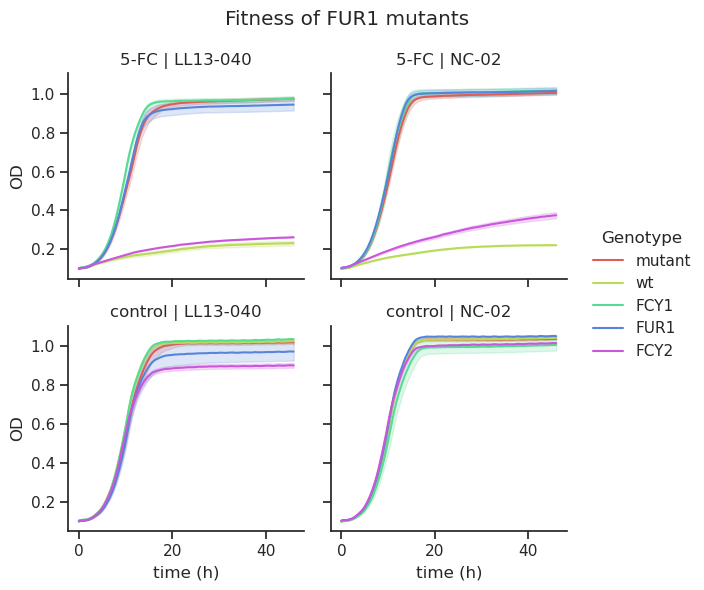

In [24]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
grid = sns.FacetGrid(data=merged_df, row='condition', col = 'strain', hue='genotype', palette='hls')
grid.map(sns.lineplot, 'time (h)', 'OD')
grid.set_titles(row_template='{row_name}', col_template='{col_name}')
grid.set_axis_labels('time (h)', 'OD')
grid.add_legend(title = 'Genotype')
grid.fig.subplots_adjust(top=0.9)
plt.suptitle('Fitness of FUR1 mutants')
grid.tight_layout()
plt.savefig('/home/rodur28/growth_curve_files/graphs/20221124_FUR1_growth-curves.svg', format='svg', dpi=300)
plt.savefig('/home/rodur28/growth_curve_files/graphs/20221124_FUR1_growth-curves.png', format='png', dpi=300)

## Calculate normalized area under the curve (AUC)

In [14]:
from flucytosine_functions import get_auc
aucdf = merged_df.groupby(['tecan_plate','well'])[['OD']].apply(func=get_auc).reset_index(name='auc')
condensed_df = annot_df.merge(right=aucdf, on=['tecan_plate','well'])
condensed_df

,tecan_plate,well,condition,mutant_plate,96_well,s_index,replicate,strain,fluc_assay,pre_culture,fluc_mutant,genotype,rearray_plate_nb,RA_well,Ngenes,Lgenes,gatk,samtools,auc
0,1,A2,5-FC,1.0,H3,1,1,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145.0,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1.0,1.0,148.763855
1,1,B2,5-FC,1.0,H3,1,2,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145.0,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1.0,1.0,146.125270
2,2,A2,control,1.0,H3,1,1,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145.0,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1.0,1.0,149.066947
3,2,B2,control,1.0,H3,1,2,LL13-040,3.0,2.0,2.0,mutant,1.0,E3,145.0,['PAU8' 'SWH1' 'FLO1' 'HAP3' 'KAP104' 'PRP6' '...,1.0,1.0,150.864062
4,1,C2,5-FC,4.0,G10,2,1,NC-02,5.0,4.0,3.0,mutant,1.0,N22,118.0,['FLO9' 'DRS2' 'FLO1' 'COR1' 'SCT1' 'PRP6' 'TI...,1.0,1.0,153.304785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,1,F11,5-FC,NaN,NaN,39,2,NC-02,NaN,NaN,NaN,FUR1,NaN,NaN,0.0,NaN,NaN,NaN,147.838045
168,2,C11,control,NaN,NaN,38,1,LL13-040,NaN,NaN,NaN,FUR1,NaN,NaN,0.0,NaN,NaN,NaN,134.568550
169,2,D11,control,NaN,NaN,38,2,LL13-040,NaN,NaN,NaN,FUR1,NaN,NaN,0.0,NaN,NaN,NaN,149.854935
170,2,E11,control,NaN,NaN,39,1,NC-02,NaN,NaN,NaN,FUR1,NaN,NaN,0.0,NaN,NaN,NaN,156.480310


In [15]:
mean_df = condensed_df.groupby(['condition','s_index','strain','genotype','Ngenes'])[['auc']].mean().reset_index()
mean_df

,condition,s_index,strain,genotype,Ngenes,auc
0,5-FC,1,LL13-040,mutant,145.0,147.444562
1,5-FC,2,NC-02,mutant,118.0,153.898458
2,5-FC,3,NC-02,mutant,102.0,156.220668
3,5-FC,4,LL13-040,mutant,123.0,148.041157
4,5-FC,5,NC-02,mutant,98.0,149.934000
...,...,...,...,...,...,...
81,control,39,NC-02,FUR1,0.0,155.769045
82,control,40,LL13-040,FCY1,0.0,152.771678
83,control,41,NC-02,FCY1,0.0,146.668201
84,control,42,LL13-040,FCY2,0.0,134.115567


In [16]:
def get_norm_auc(df, c, s):
    conditions = ['condition','strain','genotype']
    condition_set = df.loc[(df.condition==c) & (df.s_index==s), conditions]
    val = df.loc[(df.condition==c) & (df.s_index==s), 'auc'].values[0]
    wtauc = df.loc[(df[conditions[0]]==condition_set.iat[0,0]) & (df[conditions[1]]==condition_set.iat[0,1]) & (df[conditions[2]]=='wt'), 'auc'].values[0]
    return val/wtauc

In [17]:
mean_df[mean_df.genotype=='wt']

,condition,s_index,strain,genotype,Ngenes,auc
35,5-FC,36,LL13-040,wt,0.0,35.316560
36,5-FC,37,NC-02,wt,0.0,34.515242
78,control,36,LL13-040,wt,0.0,151.746742
79,control,37,NC-02,wt,0.0,153.353814


In [18]:
mean_df['norm_auc'] = mean_df.apply(lambda row: get_norm_auc(mean_df, row.condition, row.s_index), axis=1)
mean_df

,condition,s_index,strain,genotype,Ngenes,auc,norm_auc
0,5-FC,1,LL13-040,mutant,145.0,147.444562,4.174941
1,5-FC,2,NC-02,mutant,118.0,153.898458,4.458855
2,5-FC,3,NC-02,mutant,102.0,156.220668,4.526136
3,5-FC,4,LL13-040,mutant,123.0,148.041157,4.191834
4,5-FC,5,NC-02,mutant,98.0,149.934000,4.343994
...,...,...,...,...,...,...,...
81,control,39,NC-02,FUR1,0.0,155.769045,1.015749
82,control,40,LL13-040,FCY1,0.0,152.771678,1.006754
83,control,41,NC-02,FCY1,0.0,146.668201,0.956404
84,control,42,LL13-040,FCY2,0.0,134.115567,0.883812


In [19]:
mean_df.Ngenes.describe()

count     86.000000
mean      97.674419
std       48.477877
min        0.000000
25%       98.500000
50%      118.000000
75%      128.500000
max      145.000000
Name: Ngenes, dtype: float64

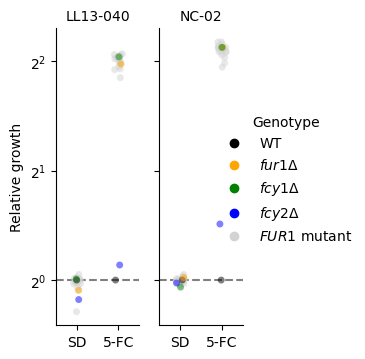

In [23]:
genotype_order = ['wt','FUR1','FCY1','FCY2','mutant']
genotype_palette = ['black','orange','green','blue','lightgrey']
fig = sns.catplot(data=mean_df, x='condition',
                  order=['control', '5-FC'],
                  y='norm_auc',
                  col = 'strain', col_order=['LL13-040','NC-02'],
                  hue='genotype', hue_order=genotype_order, palette=genotype_palette, alpha=.5,
                  legend_out=False,
                  height=3.7, aspect=0.36 # height*aspect = width of EACH facet
                 )
fig.map(plt.axhline, y=1, ls='--', c='grey')
plt.yscale('log',base=2)
fig.set_xticklabels(['SD','5-FC'])
fig.set_axis_labels('', 'Relative growth')
fig.set_titles(col_template='{col_name}')
fig._legend.set_title('Genotype')
for i, v in enumerate(['WT',  u'$\it{fur1}$Δ', u'$\it{fcy1}$Δ', u'$\it{fcy2}$Δ', u'$\it{FUR1}$ mutant']):
    fig._legend.texts[i].set_text(v)

#fig.fig.subplots_adjust(top=0.92)
#fig.fig.suptitle('Relative fitness of $\it{FUR1}$ mutants')
fig.tight_layout()
plt.savefig(graph_outpath+'20230413_FUR1_validation_relfit.png', format='png', dpi=300)
plt.savefig(graph_outpath+'20230413_FUR1_validation_relfit.svg', format='svg', dpi=300)